# Marketing Campaign- Web Purchase Prediction Case Study
In this case study, the task is to create a machine learning model which can predict the web purchases based on customer pattern and marketing campaign. And also to find factors which are significantly related to the number of web purchases.

## 1. Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "marketing_data.csv". This file contains 2240 marketing data.

### Data desciption
The business meaning of each column in the data is as below

* <b>ID</b>:	Customer's unique identifier
* <b>Year_Birth</b>:	Customer's birth year
* <b>Education</b>:	Customer's education level
* <b>Marital_Status</b>:	Customer's marital status
* <b>Income</b></b>: 	Customer's yearly household income
* <b>Kidhome</b>:	Number of children in customer's household
* <b>Teenhome</b>:	Number of teenagers in customer's household
* <b>Dt_Customer</b>:	Date of customer's enrollment with the company
* <b>Recency</b>:	Number of days since customer's last purchase
* <b>MntWines</b>:	Amount spent on wine in the last 2 years
* <b>MntFruits</b>:	Amount spent on fruits in the last 2 years
* <b>MntMeatProducts</b>:	Amount spent on meat in the last 2 years
* <b>MntFishProducts</b>:	Amount spent on fish in the last 2 years
* <b>MntSweetProducts</b>:	Amount spent on sweets in the last 2 years
* <b>MntGoldProds</b>:	Amount spent on gold in the last 2 years
* <b>NumDealsPurchases</b>:	Number of purchases made with a discount
* <b>NumWebPurchases</b>:	Number of purchases made through the company's web site
* <b>NumCatalogPurchases</b>:	Number of purchases made using a catalogue
* <b>NumStorePurchases</b>:	Number of purchases made directly in stores
* <b>NumWebVisitsMonth</b>:	Number of visits to company's web site in the last month
* <b>AcceptedCmp3</b>:	1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* <b>AcceptedCmp4</b>:	1 if customer accepted the offer in the 4th campaign, 0 otherwise
* <b>AcceptedCmp5</b>:	1 if customer accepted the offer in the 5th campaign, 0 otherwise
* <b>AcceptedCmp1</b>:	1 if customer accepted the offer in the 1st campaign, 0 otherwise
* <b>AcceptedCmp2</b>:	1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* <b>Response</b>:	1 if customer accepted the offer in the last campaign, 0 otherwise
* <b>Complain</b>:	1 if customer complained in the last 2 years, 0 otherwise
* <b>Country</b>:	Customer's location


In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
MarketingData=pd.read_csv('marketingdatacsv.csv', encoding='latin')
print('Shape before deleting duplicate values:', MarketingData.shape)

# Removing duplicate rows if any
MarketingData=MarketingData.drop_duplicates()
print('Shape After deleting duplicate values:', MarketingData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
MarketingData.head(10)

Shape before deleting duplicate values: (2240, 28)
Shape After deleting duplicate values: (2240, 28)


,ï»¿ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,16-06-2014,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,13-05-2014,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,11-05-2014,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,08-04-2014,0,6,...,2,7,1,0,0,0,0,1,0,Spain
5,7348,1958,PhD,Single,71691.0,0,0,17-03-2014,0,336,...,5,2,0,0,0,0,0,1,0,Spain
6,4073,1954,2n Cycle,Married,63564.0,0,0,29-01-2014,0,769,...,7,6,1,0,0,0,0,1,0,Germany
7,1991,1967,Graduation,Together,44931.0,0,1,18-01-2014,0,78,...,3,5,0,0,0,0,0,0,0,Spain
8,4047,1954,PhD,Married,65324.0,0,1,11-01-2014,0,384,...,9,4,0,0,0,0,0,0,0,USA
9,9477,1954,PhD,Married,65324.0,0,1,11-01-2014,0,384,...,9,4,0,0,0,0,0,0,0,India


In [3]:
MarketingData.columns[0]

'ï»¿ID'

In [4]:
#changing 1st column name
MarketingData.rename(columns={MarketingData.columns[0]: 'ID'}, inplace=True)

In [5]:
MarketingData.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

## 2. Defining the problem statement:

#### Create a ML model which predict the number of web purchases based on customer profiles, product preferences, campaign successes/failures, and channel performance

* Target Variable: NumWebPurchases
* Predictors: Education, Income, MntMeatProducts etc.

## 3. Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is Categorical.

## 4. Looking at the distribution of Target variable

<AxesSubplot:>

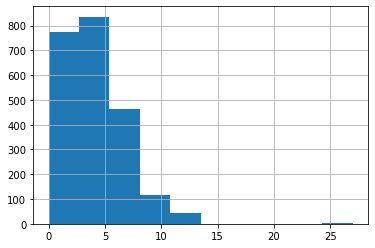

In [6]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
MarketingData['NumWebPurchases'].hist()

In [7]:
MarketingData['NumWebPurchases'][MarketingData['NumWebPurchases']<20].sort_values(ascending=False)

2057    11
41      11
1741    11
2031    11
2209    11
        ..
161      0
1763     0
386      0
2156     0
297      0
Name: NumWebPurchases, Length: 2236, dtype: int64

In [8]:
# Replacing outliers with nearest possibe value
MarketingData['NumWebPurchases'][MarketingData['NumWebPurchases']>11] =11

<AxesSubplot:>

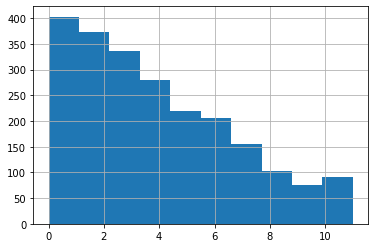

In [9]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
MarketingData['NumWebPurchases'].hist()

In [10]:
#find the median 
MarketingData['NumWebPurchases'].median()

4.0

#### Classes are:
1. LowWebPurchase :(<=4 NumWebPurchases) => 0
2. HighWebPurchase :(>4 NumWebPurchases) => 1

In [11]:
##convert target variable to nominal numeric 1/0 mapping
targets = np.where(MarketingData['NumWebPurchases'] >
                   MarketingData['NumWebPurchases'].median(), 1, 0 )

targets

array([0, 1, 0, ..., 1, 1, 1])

In [12]:
#create new column 'Excessive Absenteeism' 
MarketingData['HighWebPurchase'] = targets
MarketingData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,HighWebPurchase
0,1826,1970,Graduation,Divorced,84835.0,0,0,16-06-2014,0,189,...,1,0,0,0,0,0,1,0,Spain,0
1,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,...,5,0,0,0,0,1,1,0,Canada,1
2,10476,1958,Graduation,Married,67267.0,0,1,13-05-2014,0,134,...,2,0,0,0,0,0,0,0,USA,0
3,1386,1967,Graduation,Together,32474.0,1,1,11-05-2014,0,10,...,7,0,0,0,0,0,0,0,Australia,0
4,5371,1989,Graduation,Single,21474.0,1,0,08-04-2014,0,6,...,7,1,0,0,0,0,1,0,Spain,0


#### Plotting target variable Excessive Absenteeism which is categorical

<AxesSubplot:xlabel='HighWebPurchase'>

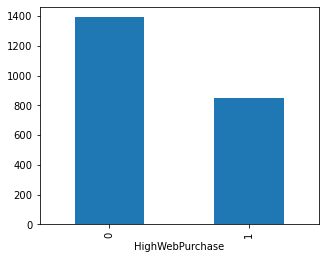

In [13]:
%matplotlib inline
#Creating Bar chart as the Target variable is Categorical
GroupedData=MarketingData.groupby('HighWebPurchase').size()
GroupedData.plot(kind='bar',figsize=(5,4))

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

## 5. Basic Data Exploration

In [14]:
# Looking at sample rows in the data
MarketingData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,HighWebPurchase
0,1826,1970,Graduation,Divorced,84835.0,0,0,16-06-2014,0,189,...,1,0,0,0,0,0,1,0,Spain,0
1,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,...,5,0,0,0,0,1,1,0,Canada,1
2,10476,1958,Graduation,Married,67267.0,0,1,13-05-2014,0,134,...,2,0,0,0,0,0,0,0,USA,0
3,1386,1967,Graduation,Together,32474.0,1,1,11-05-2014,0,10,...,7,0,0,0,0,0,0,0,Australia,0
4,5371,1989,Graduation,Single,21474.0,1,0,08-04-2014,0,6,...,7,1,0,0,0,0,1,0,Spain,0


In [15]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
MarketingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [16]:
# Looking at the descriptive statistics of the data
MarketingData.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,HighWebPurchase
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN,0.378571
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN,0.485139
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000


In [17]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
MarketingData.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          12
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
HighWebPurchase           2
dtype: int64

#### Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created.
* ID: Qualitative. Not Selected.
* Year_Birth : Continuous. Rejected. A new feature can be engineered from it.
* Education: Categorical. Selected.
* Marital_Status: Categorical. Selected.
* Income : Continuous. Selected. 
* Kidhome : Categorical. Selected.
* Teenhome: Categorical. Selected.
* Dt_Customer: Continuous. Rejected. A new feature can be engineered from it.
* Recency: Continuous. Rejected. A new feature can be engineered from it.
* MntWines : Continuous. Selected. 
* MntFruits: Continuous. Selected. 
* MntMeatProducts: Continuous. Selected. 
* MntFishProducts: Continuous. Selected. 
* MntSweetProducts: Continuous. Selected. 
* MntGoldProds: Continuous. Selected. 
* NumDealsPurchases: Continuous. Selected. 
* NumWebPurchases : Continuous. Rejected as we have featured the target variable.
* NumCatalogPurchases: Continuous. Selected. 
* NumStorePurchases: Continuous. Selected. 
* NumWebVisitsMonth: Continuous. Selected. 
* AcceptedCmp3: Categorical. Selected.
* AcceptedCmp4: Categorical. Selected.
* AcceptedCmp5: Categorical. Selected.
* AcceptedCmp1: Categorical. Selected.
* AcceptedCmp2: Categorical. Selected.
* Response: Categorical. Selected.
* Complain: Qualitative. Not Selected.
* Country : Categorical. Selected.    
* HighWebPurchase : Categorical. Selected. This is the Target Variable

## 6. Feature Engineering

#### Feature engineering on 'Year_Birth' to get 'age' column 

In [18]:
type(MarketingData['Year_Birth'][0])
MarketingData['Year_Birth']

0       1970
1       1961
2       1958
3       1967
4       1989
        ... 
2235    1976
2236    1977
2237    1976
2238    1978
2239    1969
Name: Year_Birth, Length: 2240, dtype: int64

In [19]:
# from datetime import date
# today= date.today()
# MarketingData[age]=today.year-10-MarketingData['Year_Birth']
MarketingData['age']=(2000-MarketingData['Year_Birth'])
MarketingData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,HighWebPurchase,age
0,1826,1970,Graduation,Divorced,84835.0,0,0,16-06-2014,0,189,...,0,0,0,0,0,1,0,Spain,0,30
1,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,...,0,0,0,0,1,1,0,Canada,1,39
2,10476,1958,Graduation,Married,67267.0,0,1,13-05-2014,0,134,...,0,0,0,0,0,0,0,USA,0,42
3,1386,1967,Graduation,Together,32474.0,1,1,11-05-2014,0,10,...,0,0,0,0,0,0,0,Australia,0,33
4,5371,1989,Graduation,Single,21474.0,1,0,08-04-2014,0,6,...,1,0,0,0,0,1,0,Spain,0,11


In [20]:
MarketingData['age'].max()

107

#### Feature engineering on 'Dt_Customer' column

In [21]:
type(MarketingData['Dt_Customer'][0])

str

In [22]:
MarketingData['Dt_Customer']

0       16-06-2014
1       15-06-2014
2       13-05-2014
3       11-05-2014
4       08-04-2014
           ...    
2235    07-03-2013
2236    22-01-2013
2237    03-12-2012
2238    29-11-2012
2239    01-09-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [23]:
# converting str column to datetime
MarketingData['Dt_Customer']=pd.to_datetime(MarketingData['Dt_Customer'],format = '%d-%m-%Y')
MarketingData['Dt_Customer']

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [24]:
type(MarketingData['Dt_Customer'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
MarketingData['Yr_Customer']=MarketingData['Dt_Customer'].dt.year

In [26]:
MarketingData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,HighWebPurchase,age,Yr_Customer
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,Spain,0,30,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,Canada,1,39,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,USA,0,42,2014
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,Australia,0,33,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,Spain,0,11,2014


## 7. Removing useless columns from the data

In [27]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['ID', 'Year_Birth','Dt_Customer', 'NumWebPurchases']
MarketingData = MarketingData.drop(UselessColumns,axis=1)
MarketingData.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,HighWebPurchase,age,Yr_Customer
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,...,0,0,0,0,1,0,Spain,0,30,2014
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,...,0,0,0,1,1,0,Canada,1,39,2014
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,...,0,0,0,0,0,0,USA,0,42,2014
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,...,0,0,0,0,0,0,Australia,0,33,2014
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,...,0,0,0,0,1,0,Spain,0,11,2014


In [28]:
MarketingData.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country',
       'HighWebPurchase', 'age', 'Yr_Customer'],
      dtype='object')

## 8. Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

#### Visualize distribution of all the Categorical Predictor variables in the data using bar plots

* <b>Categorical Predictors</b>: 'Education','Marital_Status','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Country', 'Yr_Customer', 'Complain'


In [29]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

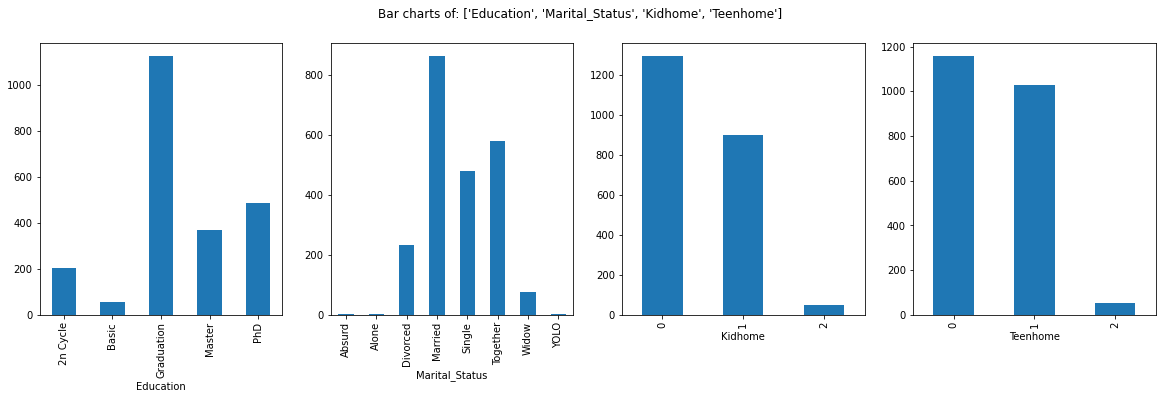

In [30]:
# Calling the function
PlotBarCharts(inpData=MarketingData, colsToPlot=['Education','Marital_Status','Kidhome','Teenhome'])

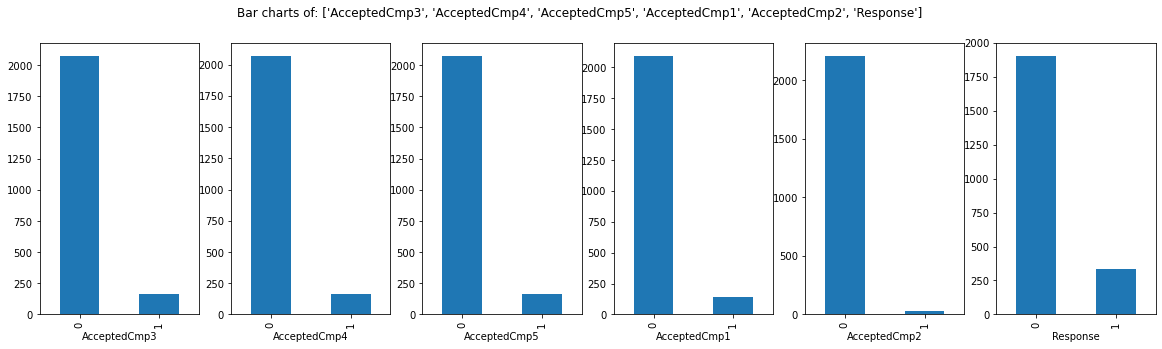

In [31]:
# Calling the function
PlotBarCharts(inpData=MarketingData, colsToPlot=['AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response'])

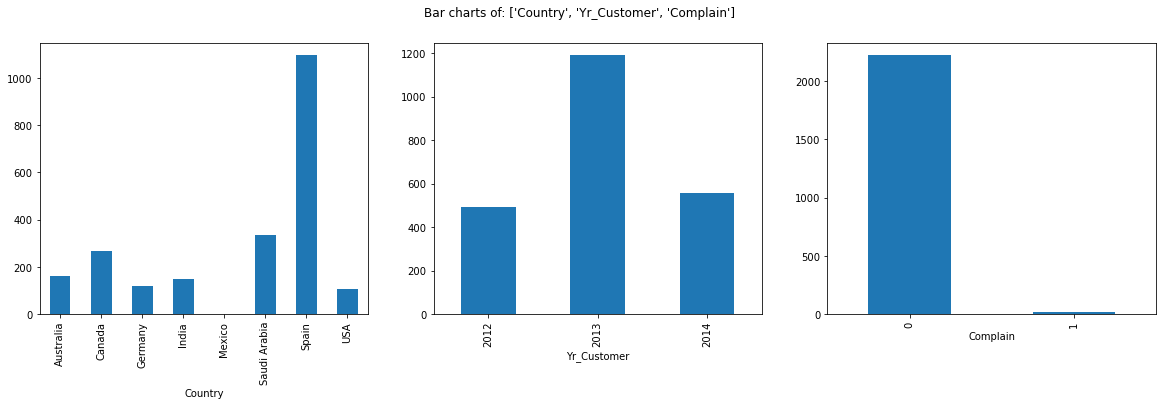

In [32]:
# Calling the function
PlotBarCharts(inpData=MarketingData, colsToPlot=['Country', 'Yr_Customer','Complain'])


#### Bar Charts Interpretation

#### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, fifteen continuous predictor variables.

* <b>Continuous Predictors</b>:
'Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds',     'NumDealsPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth', 'age'

array([[<AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>],
       [<AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>],
       [<AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>]], dtype=object)

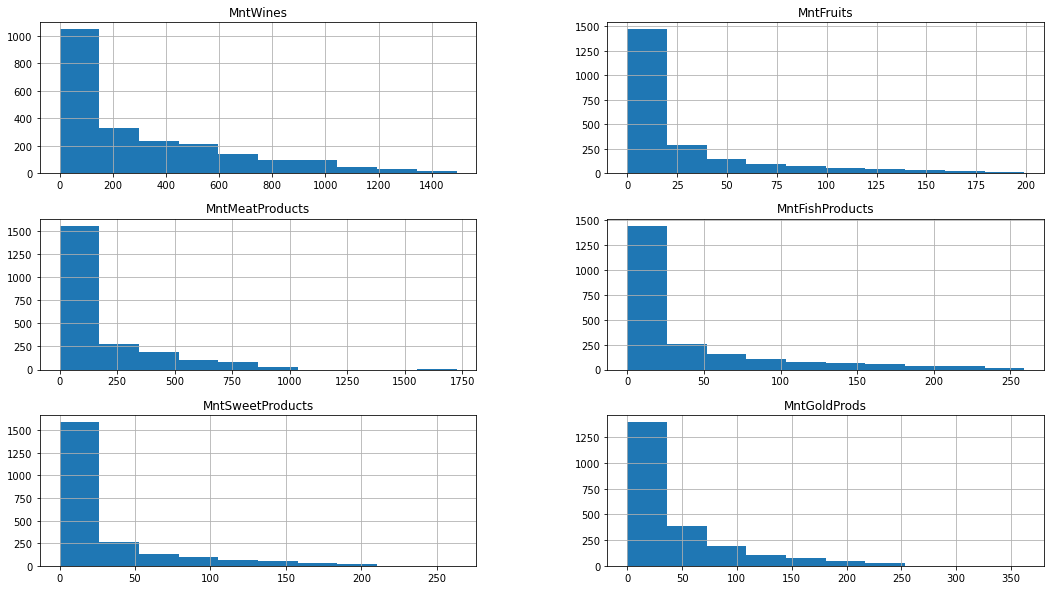

In [33]:
# Plotting histograms of multiple columns together
MarketingData.hist([ 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], figsize=(18,10))

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

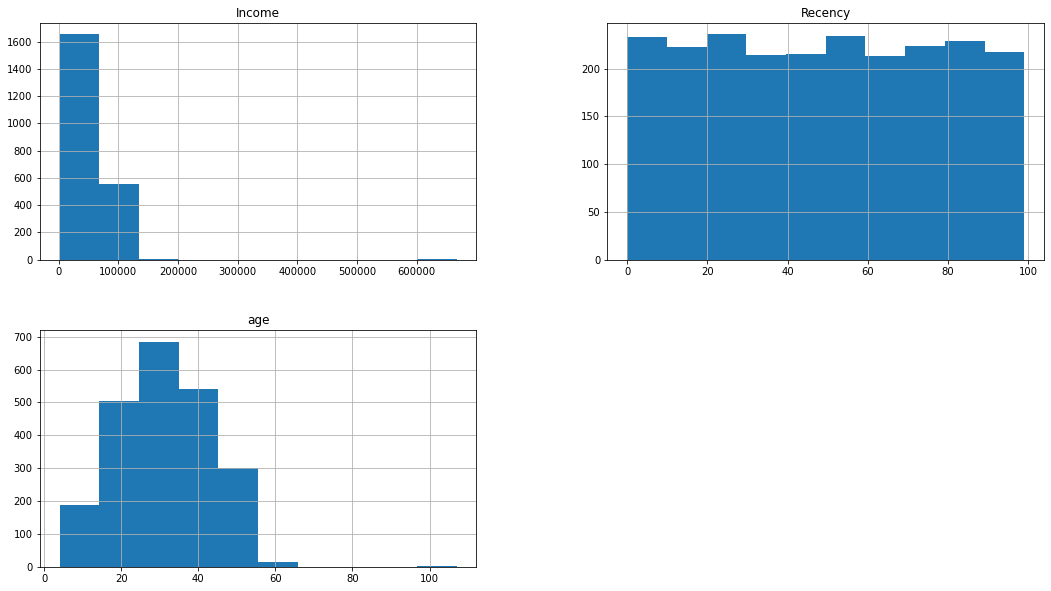

In [34]:
MarketingData.hist(['Income','Recency', 'age'], figsize=(18,10))

array([[<AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>],
       [<AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>]], dtype=object)

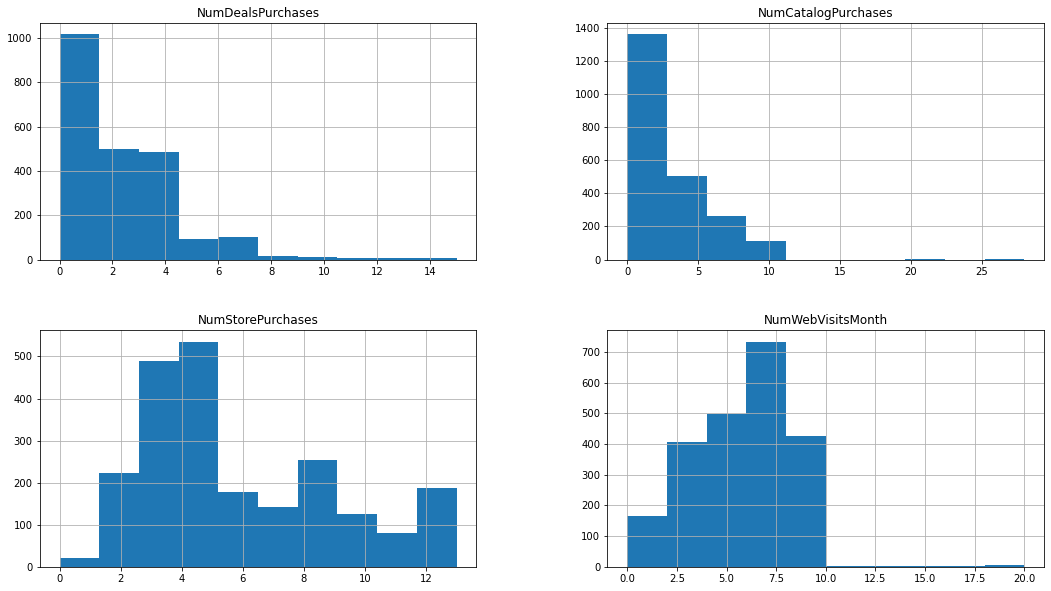

In [35]:
MarketingData.hist(['NumDealsPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth'], figsize=(18,10))

#### Histogram Interpretation

## 9. Outlier treatment

#### Replacing outliers for 'Income'

In [36]:
# Finding nearest values to 200000 mark
MarketingData['Income'][MarketingData['Income']<200000].sort_values(ascending=False)

731     162397.0
497     160803.0
853     157733.0
2204    157243.0
325     157146.0
          ...   
14        4428.0
663       4023.0
1291      3502.0
961       2447.0
1466      1730.0
Name: Income, Length: 2215, dtype: float64

Above result shows the nearest logical value is 162397, hence, replacing any value above 200000 with it.

In [37]:
# Replacing outliers with nearest possibe value
MarketingData['Income'][MarketingData['Income']>200000] =162397

#### Replacing outliers for 'Age'

In [38]:
# Finding nearest values to 70 mark
MarketingData['age'][MarketingData['age']<70].sort_values(ascending=False)

2171    60
1740    59
1693    57
1208    57
1475    57
        ..
697      5
1298     5
1467     5
562      4
1824     4
Name: age, Length: 2237, dtype: int64

In [39]:
# Replacing outliers with nearest possibe value
MarketingData['age'][MarketingData['age']>70] =60

#### Visualizing distribution after outlier treatment

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

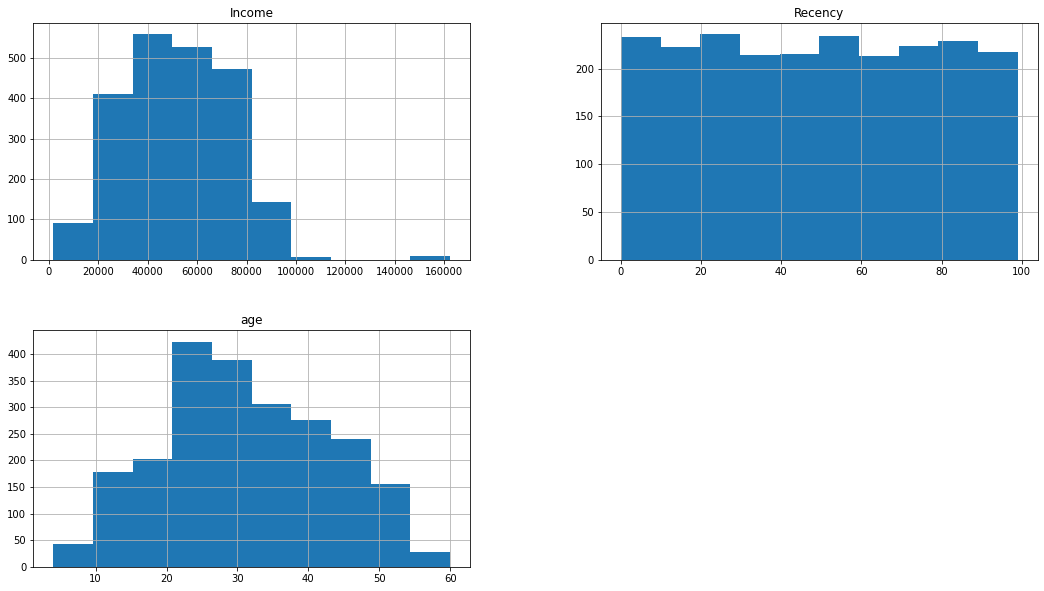

In [40]:
MarketingData.hist(['Income','Recency', 'age'], figsize=(18,10))

## 10. Missing values treatment

In [41]:
# Finding how many missing values are there for each column
MarketingData.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
HighWebPurchase         0
age                     0
Yr_Customer             0
dtype: int64

In [42]:
#Check the rows where data is missing
IncomeMissing=MarketingData['Income'].isnull()

In [43]:
MarketingData[IncomeMissing].head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,HighWebPurchase,age,Yr_Customer
134,PhD,Married,NaN,2,1,4,230,42,192,49,...,0,0,0,0,0,0,Germany,1,43,2012
262,Graduation,Married,NaN,1,0,11,5,5,6,0,...,0,0,0,0,0,0,USA,0,17,2013
394,PhD,Together,NaN,1,0,17,25,1,13,0,...,0,0,0,0,0,0,Australia,0,28,2014
449,Graduation,Single,NaN,1,0,19,5,1,3,3,...,0,0,0,0,0,0,Australia,1,14,2013
525,PhD,Married,NaN,0,1,23,352,0,27,10,...,0,0,0,0,0,0,Canada,1,39,2013


##### I am treating missing values of Income with Median as it has Continuous values

In [44]:
MarketingData['Income'].median()

51381.5

In [45]:
# Treating missing values of continuous variable with Median value
MarketingData['Income'].fillna(value=MarketingData['Income'].median(), inplace=True)

In [46]:
MarketingData.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
HighWebPurchase        0
age                    0
Yr_Customer            0
dtype: int64

## 11. Feature Selection

### Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

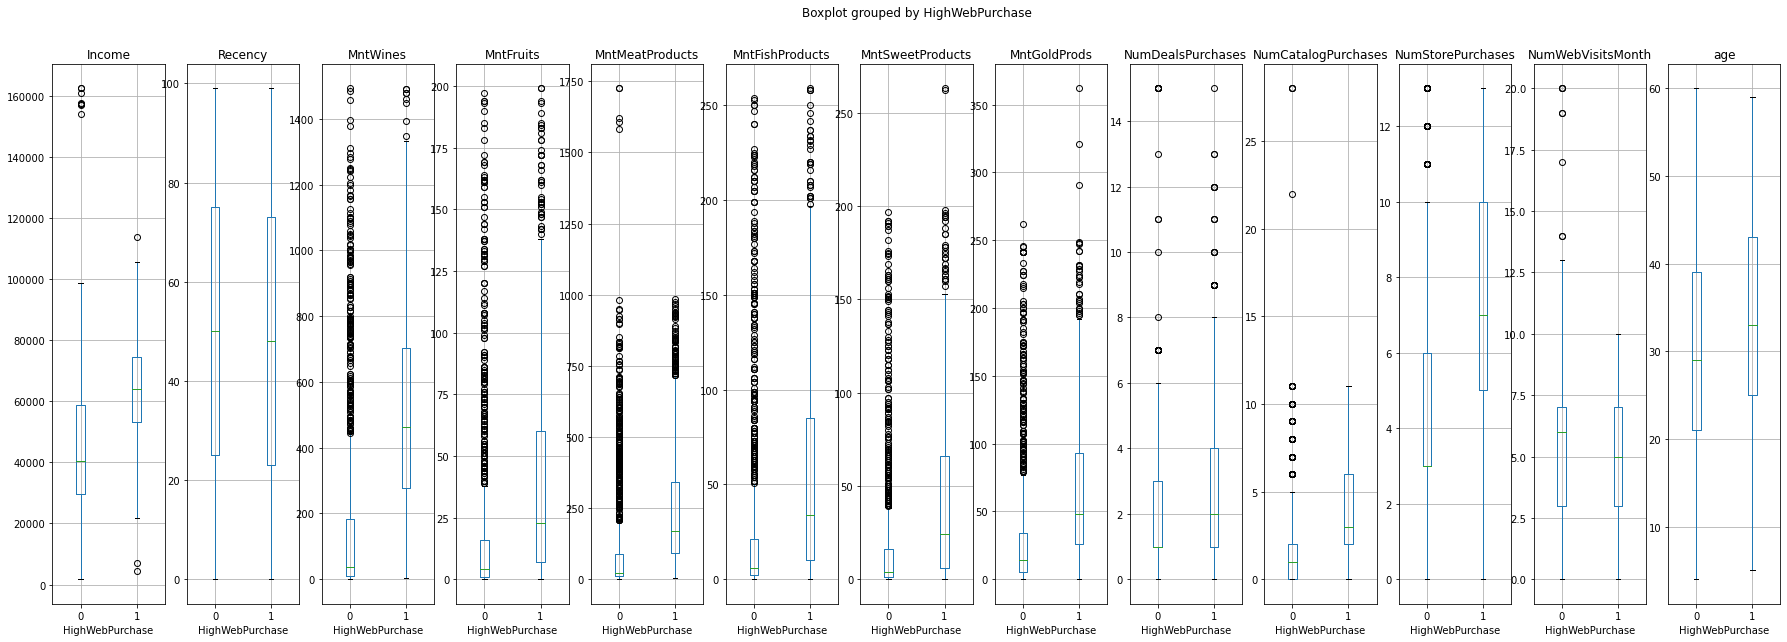

In [48]:
# Box plots for Categorical Target Variable "Survived" and continuous predictors
ContinuousColsList=['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases',
                'NumStorePurchases', 'NumWebVisitsMonth', 'age']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(30,10))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    MarketingData.boxplot(column=PredictorCol, by='HighWebPurchase', figsize=(5,5), vert=True, ax=PlotCanvas[i])


### Box-plots interpretation

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
ANOVA Test result: Probability of H0 being true

In [49]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [50]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases',
                'NumStorePurchases', 'NumWebVisitsMonth', 'age']
FunctionAnova(inpData=MarketingData, TargetVariable='HighWebPurchase', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Income is correlated with HighWebPurchase | P-Value: 1.2461948616653211e-96
Recency is NOT correlated with HighWebPurchase | P-Value: 0.2718173679645654
MntWines is correlated with HighWebPurchase | P-Value: 3.0596067401269777e-139
MntFruits is correlated with HighWebPurchase | P-Value: 1.876977305435511e-40
MntMeatProducts is correlated with HighWebPurchase | P-Value: 6.6057128679852505e-47
MntFishProducts is correlated with HighWebPurchase | P-Value: 2.3274083312240398e-37
MntSweetProducts is correlated with HighWebPurchase | P-Value: 1.162312552443445e-46
MntGoldProds is correlated with HighWebPurchase | P-Value: 1.730110190881204e-63
NumDealsPurchases is correlated with HighWebPurchase | P-Value: 2.1167129109872713e-23
NumCatalogPurchases is correlated with HighWebPurchase | P-Value: 8.90903857290123e-75
NumStorePurchases is correlated with HighWebPurchase | P-Value: 6.387057272780662e-129
NumWebVisitsMonth is NOT correlated with HighWebPurchase | P-Valu

['Income',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'age']

#### Final selected Continuous columns:
'Income','MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases','NumStorePurchases', 'age'            


### Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

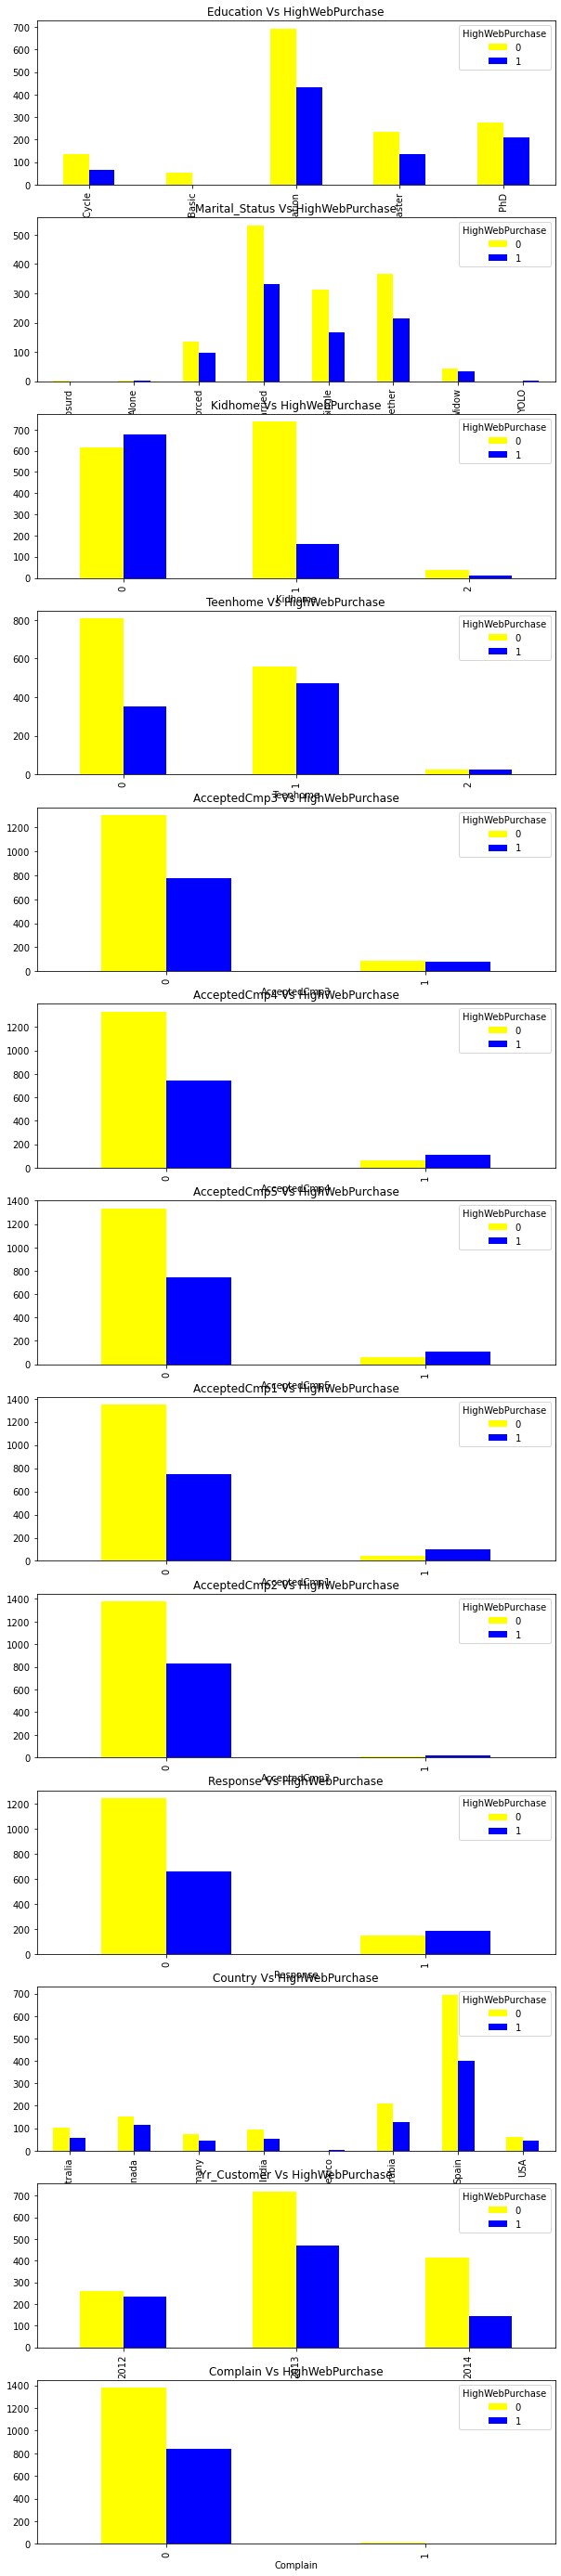

In [53]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Education','Marital_Status','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4',
                     'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Country', 'Yr_Customer', 'Complain']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=MarketingData[CategoricalCol], columns=MarketingData['HighWebPurchase'])
    CrossTabResult.plot.bar(color=['yellow','blue'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'HighWebPurchase')

### Grouped Bar charts Interpretation

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True
* More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [54]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [55]:
CategoricalVariables=['Education','Marital_Status','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4',
                     'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Country', 'Yr_Customer', 'Complain']

# Calling the function
FunctionChisq(inpData=MarketingData, 
              TargetVariable='HighWebPurchase',
              CategoricalVariablesList= CategoricalVariables)

Education is correlated with HighWebPurchase | P-Value: 9.035376006123997e-08
Marital_Status is NOT correlated with HighWebPurchase | P-Value: 0.1894114276776036
Kidhome is correlated with HighWebPurchase | P-Value: 1.7003107931005972e-59
Teenhome is correlated with HighWebPurchase | P-Value: 1.2236028886836637e-13
AcceptedCmp3 is correlated with HighWebPurchase | P-Value: 0.031920205417805256
AcceptedCmp4 is correlated with HighWebPurchase | P-Value: 7.102929975715519e-13
AcceptedCmp5 is correlated with HighWebPurchase | P-Value: 2.069615271119587e-13
AcceptedCmp1 is correlated with HighWebPurchase | P-Value: 5.607091133388352e-15
AcceptedCmp2 is NOT correlated with HighWebPurchase | P-Value: 0.1164167723007067
Response is correlated with HighWebPurchase | P-Value: 5.101116603859438e-13
Country is NOT correlated with HighWebPurchase | P-Value: 0.48890337149895446
Yr_Customer is correlated with HighWebPurchase | P-Value: 4.0517741879840836e-13
Complain is NOT correlated with HighWebPur

['Education',
 'Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'Response',
 'Yr_Customer']

<b>Final selected Categorical columns:</b>

'Education','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'AcceptedCmp1', 'Response','Yr_Customer'

### Selecting final predictors for Machine Learning

In [56]:
SelectedColumns=['Income','MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts',
                 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases','NumStorePurchases', 'age',
                'Education','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 
                 'AcceptedCmp1', 'Response','Yr_Customer']

#Selecting final columns
DataForML=MarketingData[SelectedColumns]
DataForML.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,age,Education,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Response,Yr_Customer
0,84835.0,189,104,379,111,189,218,1,4,6,30,Graduation,0,0,0,0,0,0,1,2014
1,57091.0,464,5,64,7,0,37,1,3,7,39,Graduation,0,0,0,0,0,0,1,2014
2,67267.0,134,11,59,15,2,30,1,2,5,42,Graduation,0,1,0,0,0,0,0,2014
3,32474.0,10,0,1,0,0,0,1,0,2,33,Graduation,1,1,0,0,0,0,0,2014
4,21474.0,6,16,24,11,0,34,2,1,2,11,Graduation,1,0,1,0,0,0,1,2014


In [57]:
# Saving this final data in serialized format for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## 12. Data Pre-processing for Machine Learning

#### 1. Converting each Ordinal Categorical columns to numeric
 Looking at unique values of ordinal column 'Education'

In [58]:
DataForML['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [59]:
# Replacing the ordinal values for Education
DataForML['Education'].replace({'Basic':1,
                         '2n Cycle':2,
                         'Graduation':3,
                         'Master':4,
                         'PhD':5},inplace=True)

In [60]:
DataForML['Education'].unique()

array([3, 5, 2, 4, 1], dtype=int64)

#### 2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
No column required 1/0 mapping

#### 3. Converting the nominal variable to numeric using get_dummies()

In [61]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['HighWebPurchase']=MarketingData['HighWebPurchase']

# Printing sample rows
DataForML_Numeric.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,...,Education,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Response,Yr_Customer,HighWebPurchase
0,84835.0,189,104,379,111,189,218,1,4,6,...,3,0,0,0,0,0,0,1,2014,0
1,57091.0,464,5,64,7,0,37,1,3,7,...,3,0,0,0,0,0,0,1,2014,1
2,67267.0,134,11,59,15,2,30,1,2,5,...,3,0,1,0,0,0,0,0,2014,0
3,32474.0,10,0,1,0,0,0,1,0,2,...,3,1,1,0,0,0,0,0,2014,0
4,21474.0,6,16,24,11,0,34,2,1,2,...,3,1,0,1,0,0,0,1,2014,0


## 13. Machine Learning: Splitting the data into Training and Testing sample

In [62]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'age', 'Education',
       'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'Response', 'Yr_Customer', 'HighWebPurchase'],
      dtype='object')

In [63]:
# Separate Target Variable and Predictor Variables
TargetVariable='HighWebPurchase'
Predictors=['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'age', 'Education',
       'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'Response', 'Yr_Customer']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=369)

## 14. Standardization/Normalization of data

In [64]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=369)

In [65]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1568, 20)
(1568,)
(672, 20)
(672,)


## 15.1. Logistic Regression

     Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.255429  0.047555   0.000000         0.007536         0.011583   
1  0.316188  0.189551   0.562814         0.087536         0.196911   
2  0.130108  0.001340   0.115578         0.006377         0.030888   
3  0.411914  0.354320   0.000000         0.206377         0.243243   
4  0.564901  0.655727   0.221106         0.542029         0.111969   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumCatalogPurchases  \
0          0.003802      0.000000           0.133333             0.035714   
1          0.273764      0.345304           0.133333             0.071429   
2          0.022814      0.127072           0.066667             0.035714   
3          0.106464      0.000000           0.200000             0.250000   
4          0.095057      0.060773           0.066667             0.178571   

   NumStorePurchases  ...  Kidhome  Teenhome  AcceptedCmp3  AcceptedCmp4  \
0           0.307692  ...      0.0      

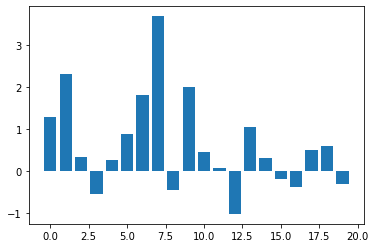

In [68]:
import time
T1=time.time()

# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')
#clf = LogisticRegression(C=1,penalty='l2', solver='liblinear')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)

# Generating predictions on testing data
prediction=LOG.predict(X_test)
# Printing sample values of prediction in Testing data
TestingData=pd.DataFrame(data=X_test, columns=Predictors)
TestingData['HighWebPurchase']=y_test
TestingData['Predicted_HighWebPurchase']=prediction
print(TestingData.head())


# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

T2=time.time()
print("Time taken:", T2-T1)

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# get importance
importance = LOG.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()



## 15.2. Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=5)
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       421
           1       0.76      0.80      0.78       251

    accuracy                           0.83       672
   macro avg       0.82      0.82      0.82       672
weighted avg       0.83      0.83      0.83       672

[[356  65]
 [ 50 201]]
Accuracy of the model on Testing Sample Data: 0.83

Accuracy values for 10-fold Cross Validation:
 [0.82647729 0.78563596 0.80536307 0.85800229 0.82479292 0.78824996
 0.814452   0.77784624 0.8134748  0.80935237]

Final Average Accuracy of the model: 0.81
Time taken: 0.19121742248535156


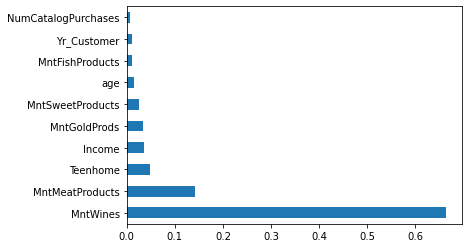

In [75]:
import time
T1=time.time()
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=5,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

T2=time.time()
print("Time taken:", T2-T1)

## 15.3. Random Forest

RandomForestClassifier(max_depth=3)
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       421
           1       0.66      0.92      0.77       251

    accuracy                           0.79       672
   macro avg       0.80      0.82      0.79       672
weighted avg       0.84      0.79      0.80       672

[[301 120]
 [ 19 232]]
Accuracy of the model on Testing Sample Data: 0.8

Accuracy values for 10-fold Cross Validation:
 [0.80641273 0.82810084 0.79324855 0.82839328 0.8460536  0.77903428
 0.74720585 0.81951468 0.82395844 0.79327198]

Final Average Accuracy of the model: 0.81
Time taken: 2.619933605194092


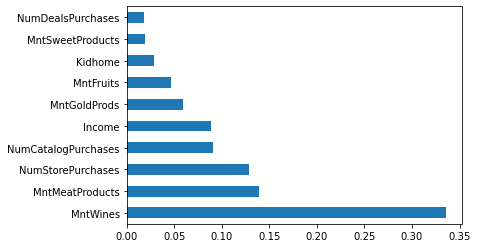

In [80]:
import time
T1=time.time()
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=3, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

T2=time.time()
print("Time taken:", T2-T1)

## 15.4. AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.01, n_estimators=100)
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       421
           1       0.70      0.90      0.79       251

    accuracy                           0.82       672
   macro avg       0.81      0.83      0.81       672
weighted avg       0.84      0.82      0.82       672

[[322  99]
 [ 24 227]]
Accuracy of the model on Testing Sample Data: 0.82

Accuracy values for 10-fold Cross Validation:
 [0.83743705 0.83651949 0.82845144 0.82845144 0.84158761 0.78400811
 0.77903428 0.81961601 0.81964235 0.83285209]

Final Average Accuracy of the model: 0.82
Time taken: 7.735038995742798


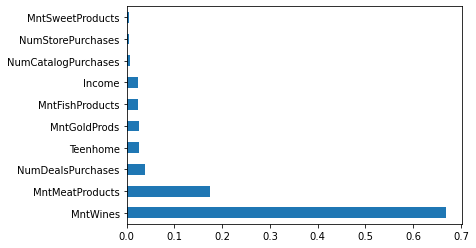

In [85]:
import time
T1=time.time()
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=3)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

T2=time.time()
print("Time taken:", T2-T1)

## 15.5. XGBoost

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       421
           1       0.69      0.85      0.76       251

    accuracy                           0.80       672
   macro avg       0.80      0.81      0.

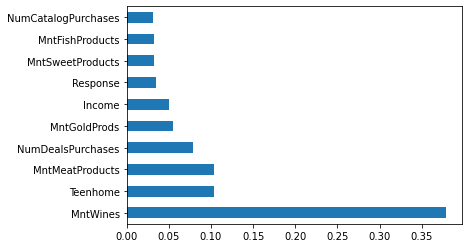

In [89]:
import time
T1=time.time()
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=100, objective='binary:logistic', booster='gbtree')
#clf=XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=100, objective='multi:softmax', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
T2=time.time()
print("Time taken:", T2-T1)

## 15.6. KNN

KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       421
           1       0.73      0.74      0.74       251

    accuracy                           0.80       672
   macro avg       0.79      0.79      0.79       672
weighted avg       0.80      0.80      0.80       672

[[352  69]
 [ 65 186]]
Accuracy of the model on Testing Sample Data: 0.8

Accuracy values for 10-fold Cross Validation:
 [0.76728189 0.76942286 0.74684066 0.76925372 0.77856575 0.76570865
 0.748761   0.71842193 0.73745421 0.74045493]

Final Average Accuracy of the model: 0.75
Time taken: 0.2257838249206543
Feature: 0, Score: 0.00750
Feature: 1, Score: 0.06170
Feature: 2, Score: 0.02893
Feature: 3, Score: 0.00821
Feature: 4, Score: 0.04259
Feature: 5, Score: 0.02018
Feature: 6, Score: 0.02464
Feature: 7, Score: 0.02589
Feature: 8, Score: 0.00295
Feature: 9, Score: 0.09143
Feature: 10, Score: 0.04277
Feature: 11, Score: 0.04884
Fea

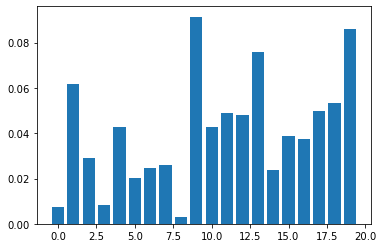

In [95]:
import time
T1=time.time()
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN
T2=time.time()
print("Time taken:", T2-T1)

# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# perform permutation importance
results = permutation_importance(KNN, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## 15.7. SVM

In [99]:
import time
T1=time.time()
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=10, kernel='rbf', gamma=0.01)

# Printing all the parameters of SVM
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel

%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')
T2=time.time()
print("Time taken:", T2-T1)

SVC(C=10, gamma=0.01)
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       421
           1       0.68      0.76      0.72       251

    accuracy                           0.78       672
   macro avg       0.76      0.77      0.77       672
weighted avg       0.78      0.78      0.78       672

[[330  91]
 [ 60 191]]
Accuracy of the model on Testing Sample Data: 0.78

Accuracy values for 10-fold Cross Validation:
 [0.80165481 0.78042082 0.76883098 0.8356685  0.8396378  0.77910952
 0.72666758 0.74523889 0.80935237 0.75104875]

Final Average Accuracy of the model: 0.78
Time taken: 2.3239800930023193


## 15.8. Naive Bayes

In [100]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       421
           1       0.65      0.71      0.68       251

    accuracy                           0.75       672
   macro avg       0.73      0.74      0.73       672
weighted avg       0.75      0.75      0.75       672

[[325  96]
 [ 74 177]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.74270073 0.79511215 0.75614839 0.75706526 0.78405801 0.7080446
 0.6785344  0.73690186 0.78618374 0.71014612]

Final Average Accuracy of the model: 0.75


#### Based on the above trials we select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing <b>Decision Trees</b> as the final model since it is very fast on this data.